https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [1]:
# univariate data preparation
from numpy import array
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers import TimeDistributed
from keras.layers.convolutional import MaxPooling1D

from keras.layers import Bidirectional

# from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
headers=['Interval','Timestamp','Flume Depth (mm)','AV Flow (L/s)', 'Flume Flow (L/s)', 'Precipitation (mm)']
df = pd.read_csv ('sani_clean.csv', names=headers)#, index_col='Timestamp', parse_dates = True)
df=df[1:]

In [3]:
flow = df[['AV Flow (L/s)']]
dataset=flow.values.astype('float32')

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
dataset = sc.fit_transform(dataset)

In [5]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [6]:
# define input sequence
raw_seq = dataset
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[[0.23668638]
 [0.14201182]
 [0.0887574 ]] [0.10059171]
[[0.14201182]
 [0.0887574 ]
 [0.10059171]] [0.13609466]
[[0.0887574 ]
 [0.10059171]
 [0.13609466]] [0.14201182]
[[0.10059171]
 [0.13609466]
 [0.14201182]] [0.11242603]
[[0.13609466]
 [0.14201182]
 [0.11242603]] [0.05325444]
[[0.14201182]
 [0.11242603]
 [0.05325444]] [0.]
[[0.11242603]
 [0.05325444]
 [0.        ]] [0.08284023]
[[0.05325444]
 [0.        ]
 [0.08284023]] [0.0887574]
[[0.        ]
 [0.08284023]
 [0.0887574 ]] [0.11834319]
[[0.08284023]
 [0.0887574 ]
 [0.11834319]] [0.0295858]
[[0.0887574 ]
 [0.11834319]
 [0.0295858 ]] [0.21301775]
[[0.11834319]
 [0.0295858 ]
 [0.21301775]] [0.01775148]
[[0.0295858 ]
 [0.21301775]
 [0.01775148]] [0.09467455]
[[0.21301775]
 [0.01775148]
 [0.09467455]] [0.06508875]
[[0.01775148]
 [0.09467455]
 [0.06508875]] [0.0887574]
[[0.09467455]
 [0.06508875]
 [0.0887574 ]] [0.04733727]
[[0.06508875]
 [0.0887574 ]
 [0.04733727]] [0.01775148]
[[0.0887574 ]
 [0.04733727]
 [0.01775148]] [0.01183432]
[[0

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [21]:
#Vanilla LSTM

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [22]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [23]:
# demonstrate prediction
x_input = array([0.51, 0.49, 0.71])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.52840376]]


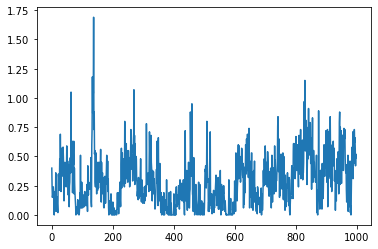

In [28]:
import matplotlib.pyplot as plt
plt.plot(dataset)
# plt.plot(yhat)

In [40]:
#Stacked LSTM

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics = ['mse', 'mae'])

In [41]:
# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 1s 4ms/step - loss: 0.0265 - mse: 0.0265 - mae: 0.1228
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0142 - mse: 0.0142 - mae: 0.0953
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0118 - mse: 0.0118 - mae: 0.0853
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0106 - mae: 0.0780
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0105 - mae: 0.0789
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0105 - mae: 0.0786
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0760
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0758
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0753
Epoch 10/200
32/32 [========

In [42]:
x_input = array([0.51, 0.49, 0.71])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
predict_yhat = sc.inverse_transform(yhat)
print(predict_yhat)

[[0.8571574]]


In [46]:
#Bidirectional LSTM
...
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [47]:
# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.0281 - mse: 0.0281 - mae: 0.1264
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0919
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0812
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0785
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - mae: 0.0759
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0742
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0745
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0739
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0738
Epoch 10/200
32/32 [========

In [48]:
x_input = array([0.51, 0.49, 0.71])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
predict_yhat = sc.inverse_transform(yhat)
print(predict_yhat)

[[0.8687785]]


In [54]:
#CNN LSTM
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(dataset, n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [55]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [56]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])



In [58]:
# fit model
model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0729
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0731
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0730
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0731
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0732
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0727
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0737
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0733
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0730
Epoch 10/500
32/32 [========

In [59]:
# demonstrate prediction
x_input = array([0.51, 0.49, 0.71, 0.76])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.48732787]]


In [8]:
#2DConv
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.3, shuffle=False)
x_train, y_train = split_sequence(train.reshape(-1, 1))
x_test, y_test = split_sequence(test.reshape(-1, 1))

In [19]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps=1):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [33]:
# define input sequence
raw_seq = dataset
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

In [11]:
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

2022-04-20 17:49:26.598129: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
# fit model
model.fit(X, y, epochs=500, verbose=1)


Epoch 1/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0700
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0709
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0703
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0701
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0701
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0698
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0703
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0699
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0699
Epoch 10/500
32/32 [========

In [28]:
model = model.save('LSTM_model.keras')

In [30]:
from tensorflow import keras
model = keras.models.load_model('LSTM_model.keras')

In [37]:
# demonstrate prediction
x_input = array([0.76, 0.59, 0.63, 0.49])
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.65132004]]


In [22]:
def plot_predictions(actual, predicted, figsize, title):
    
    plt.figure(figsize=figsize)
    actual = plt.plot(actual, color='blue', label='Actual')
    predicted = plt.plot(predicted, color='red', label='Predicted')
    plt.title(title)
    plt.legend()
    plt.savefig("LASTM_Training.png")
    plt.show()

In [23]:
trainPredict = model.predict(X)
# testPredict = model.predict(x_test)

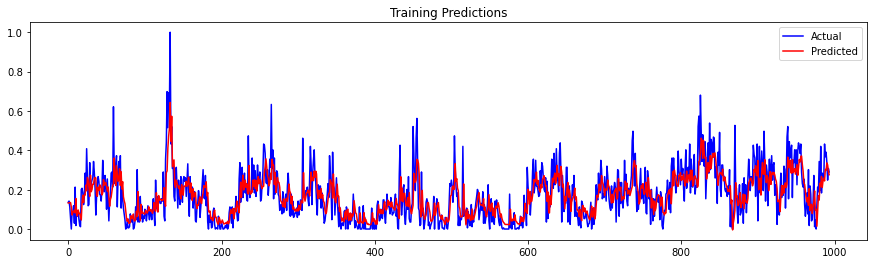

In [24]:
plot_predictions(y, trainPredict, figsize=(15, 4), title='Training Predictions')
